### Task 4 -  Group Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import csv
#from detect_delimiter import detect

import project_functions2 as pf2
import functions_1 as fn1
all_clean = pf2.load_and_process("../data/raw/pwt100.csv","../data/raw/days-of-vacation-and-holidays.csv")
all_clean.head()

C:\Users\8jaso\onedrive\desktop\cosc-301\project-group17\notebooks\project_functions2.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_clean = df_clean[df_clean["country"] == df_clean["Entity"]].drop(["Entity"], axis=1)[df_clean['year'] >= 1980]


,countrycode,country,currency_unit,year,rgdpe,pop,emp,avh,hc,cn,ctfp,vac,prod
590,AUS,Australia,Australian Dollar,1980,349085.7813,14.588405,6.277514,1909.762827,3.213360,1535867.125,0.845172,32.0,58.236464
591,AUS,Australia,Australian Dollar,1981,366343.1250,14.777243,6.356343,1894.809448,3.232605,1602208.250,0.856549,32.0,60.833830
592,AUS,Australia,Australian Dollar,1982,357623.9688,14.979205,6.340231,1870.658317,3.251965,1648038.250,0.845694,32.0,60.305516
593,AUS,Australia,Australian Dollar,1983,377933.2813,15.194641,6.241294,1857.014130,3.271441,1689566.875,0.871549,32.0,65.216170
594,AUS,Australia,Australian Dollar,1984,392094.8750,15.423166,6.458382,1878.158461,3.291033,1742347.000,0.839384,32.0,64.649503


**Figure 1 - Correlation Matrix**

**Note:**
- -1 = perfect negative linear correlation (as x value decreases, y value decreases as well)
- 0 = non-existent linear correlation
- +1 = perfect positive linear correlation (as x value increases, y value increases as well)

<AxesSubplot:title={'center':'Correlation Matrix'}>

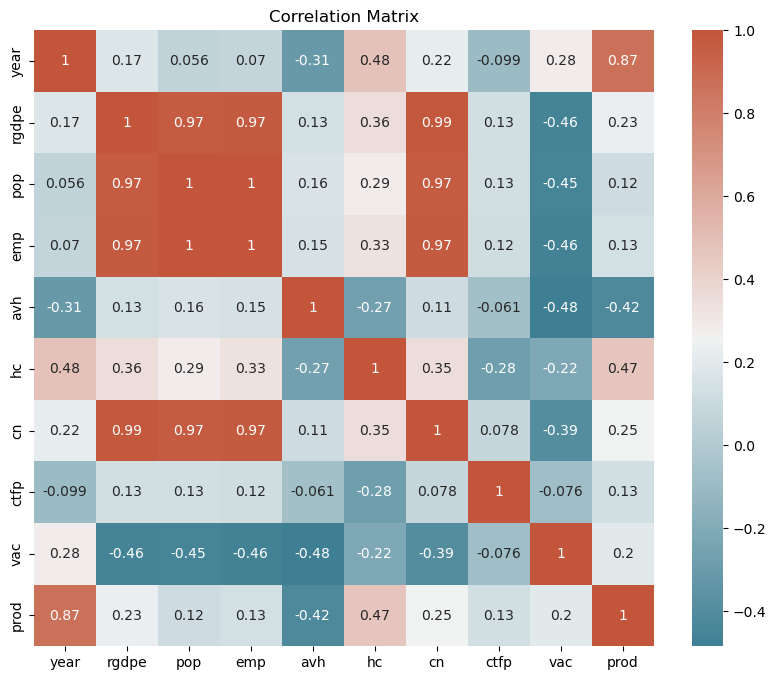

In [2]:
fig, ax = plt.subplots(figsize=(10,8)) 
ax.set_title('Correlation Matrix')
corr = all_clean.corr() 
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

This quick correlation matrix gives great insight into how our different variables are related. For one, we can see that there is a decent _negative_ correlation between **avh**, average hours worked per year, and the year. Simultaneously, over the years there is a positive change in the productivity. Let's look into this further below.

**Figure 2 - Year and Productivity**

Text(0.5, 1.0, 'Productivity of Engaged Population across Years')

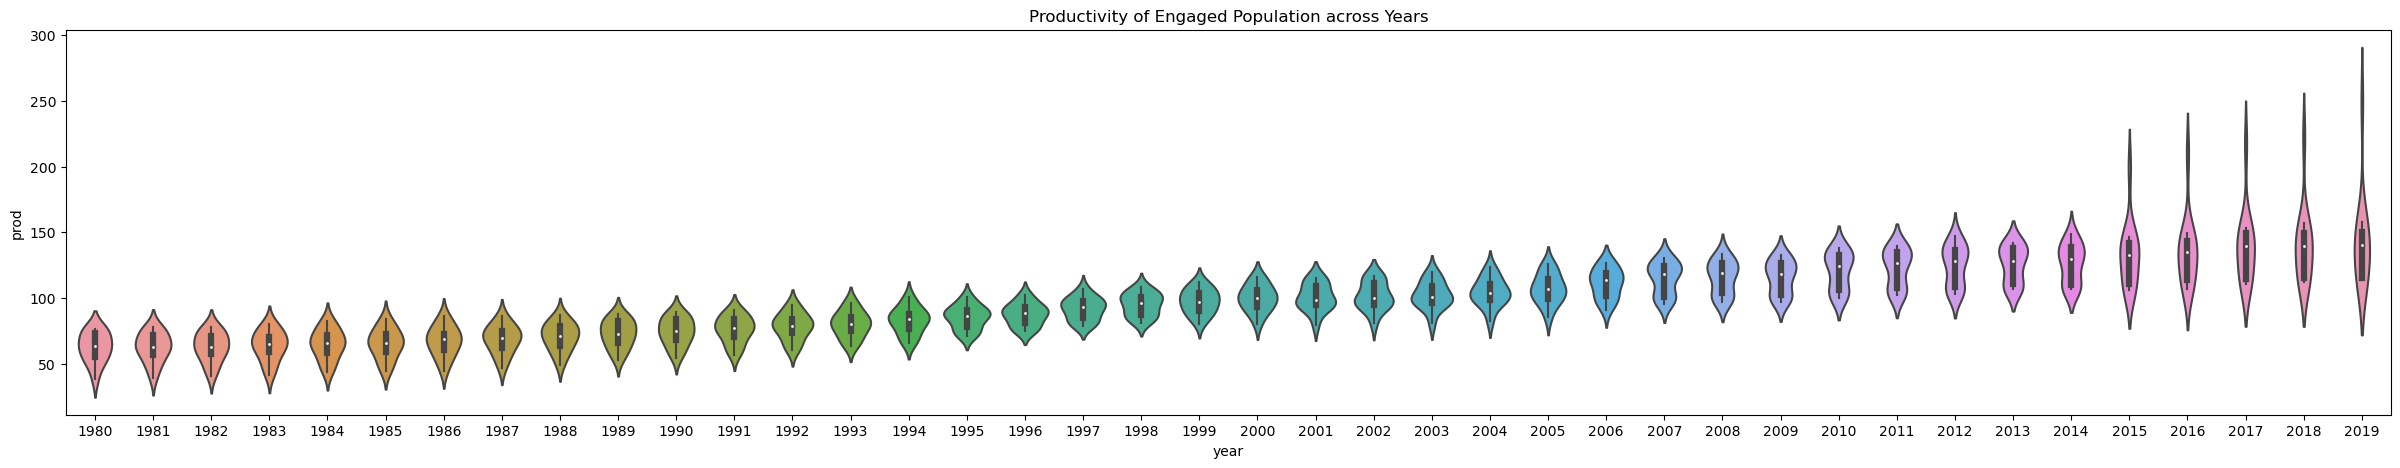

In [3]:
fig, ax = plt.subplots(figsize=(30, 5))
sns.violinplot(data=all_clean, x="year", y="prod")
ax.set_title('Productivity of Engaged Population across Years')

##This is kinda long, probably not going to use for actual analysis

This figure shows us that from 1950 to 2019, productivity has steadily rose together in all of the selected countries and appears, on average, to have hit a plateau in the 2010s but with signifcant outliers appearing from 2015 onwards . 

**Figure 3 - Average Annual Hours Worked per Year and Productivity**

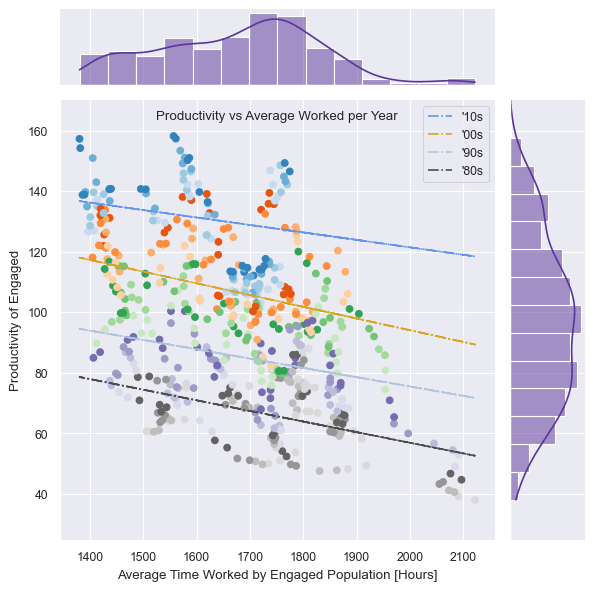

In [4]:
sns.set_palette("twilight_shifted")
sns.set_style("darkgrid")
sns.set_context("paper")
ax1=sns.jointplot(x = all_clean['avh'], y = all_clean['prod'], kind = 'reg',truncate=False)
ax1.ax_joint.cla()

X = all_clean['avh'].to_numpy()
Y = all_clean['prod'].to_numpy()
z = all_clean['year'].to_numpy()

ind1 = np.where((z >= 1980)&(z<1990))
ind2 = np.where((z >= 1990)&(z<2000))
ind3 = np.where((z >= 2000)&(z<2010))
ind4 = np.where((z >= 2010)&(z<2020))
coef1 = np.polyfit(X[ind1], Y[ind1], 1)
p1 = np.poly1d(coef1)
coef2 = np.polyfit(X[ind2], Y[ind2], 1)
p2 = np.poly1d(coef2)
coef3 = np.polyfit(X[ind3], Y[ind3], 1)
p3 = np.poly1d(coef3)
coef4 = np.polyfit(X[ind4], Y[ind4], 1)
p4 = np.poly1d(coef4)

plt.xlabel("Average Time Worked by Engaged Population [Hours]")
plt.ylabel("Productivity of Engaged")
plt.scatter(x = X, y = Y, c=z, cmap='tab20c_r')
plt.plot(X, p4(X), c='cornflowerblue', linestyle='-.', label="'10s")
plt.plot(X, p3(X), 'goldenrod', linestyle='-.', label="'00s")
plt.plot(X, p2(X), 'lightsteelblue', linestyle='-.', label="'90s")
plt.plot(X, p1(X), '0.3', linestyle='-.', label="'80s")



plt.ylim(25, 170)
plt.title('Productivity vs Average Worked per Year',y=1.0, pad=-14)
plt.legend()

Plotted above on the y-axis is a measure of Productivity that we have calculated. It is based on the Expenditure-side real GDP produced per Hour Worked by those engaged in a population _(an"engaged" member of a population is anyone employed)_. The x-axis is data on the average time worked by said engaged population. We observe two trends here. For one, less average time worked seems to be positively correlated with the productivity produced. One must be careful to conflate correlation with causation, but this bodes well to the idea of overworking leading to a drop off in the effectiveness of employees! The other trend is that we see a clear increase in productivity over time. The most productive average employee in the 1980's is nearly 60% as productive as the least average employee in the 2010s! We will follow up below as to factors that could have changed over the decades to make employees more effective at their work. 

_method of plotting a matplotlib.pyplot scatterplot overtop of the seaborn jointplot adapted from here: https://stackoverflow.com/questions/53964485/seaborn-jointplot-color-by-density_

**Figure 4 - Human Capital Index and Productivity**

Text(0.5, 1.0, 'Country-by-Country -- Productivity vs Human Capital Index')

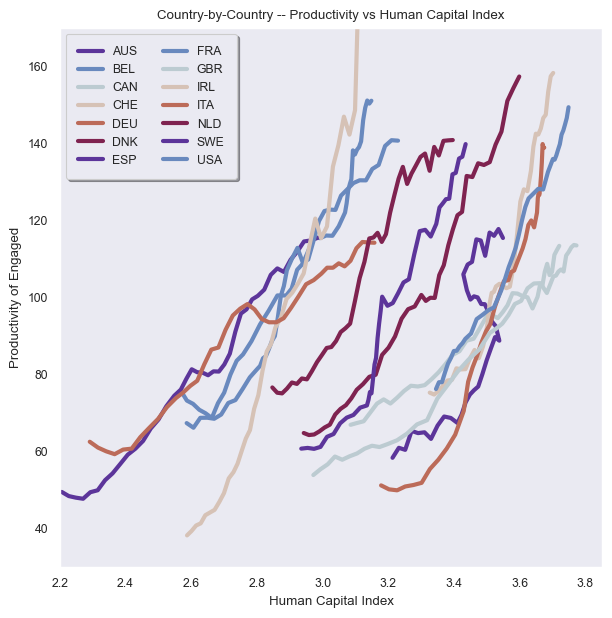

In [5]:
lis = all_clean['countrycode'].unique().tolist()
fig, ax = plt.subplots(figsize=(7,7))
for i in np.arange(0,len(lis)):
    all_clean_i = all_clean[all_clean['countrycode'] == lis[i]]


    ax.plot(all_clean_i["hc"], all_clean_i["prod"], label=lis[i], linewidth=3)
ax.set_ylim(30,170)
ax.set_xlim(2.2)
ax.set_xlabel('Human Capital Index')
ax.set_ylabel("Productivity of Engaged")
ax.grid()
ax.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1,ncol=2)
ax.set_title("Country-by-Country -- Productivity vs Human Capital Index")

This figure shows that as productivity has increased, human capital index has followed a similar positive trend across all countries. The human capital index (HCI) is a world bank statistic released annually that measures how much economic capital is loss through lack of education and health. Therefore, this means that the higher a country scores on the HCI, the higher the quality of the education and healthcare systems that are in place to support the workers in the state. With the benefit of hindsight, this is expected in the countries selected as these states are all considered to be 'first world countries' and it makes logical sense that the more educated and healthy the working population is, the more efficient and effective their input into the economy will be. 

Information about the human capital index obtained from here: https://www.worldbank.org/en/publication/human-capital

**Figure 5 - Vacation Days and Productivity**

In [6]:
df_clean = fn1.clean_and_secure('../data/raw/pwt100.csv', '../data/raw/days-of-vacation-and-holidays.csv')

<AxesSubplot:xlabel='vacation days', ylabel='productivity'>

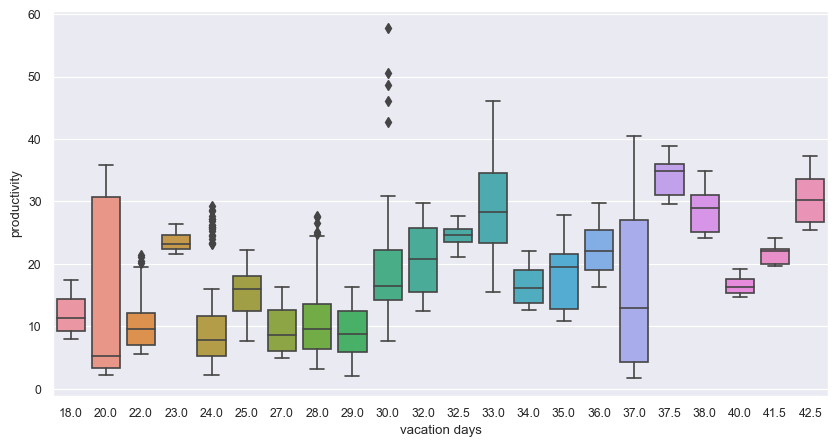

In [7]:
plt.figure(figsize=(10,5))
sns.boxplot(x='vacation days', y='productivity', data = df_clean)

It appears that between 30 and 42 vacation days per year is correlated with higher productivity. This will be investigated further in the next figure.

<AxesSubplot:xlabel='Year', ylabel='gdp per vac days'>

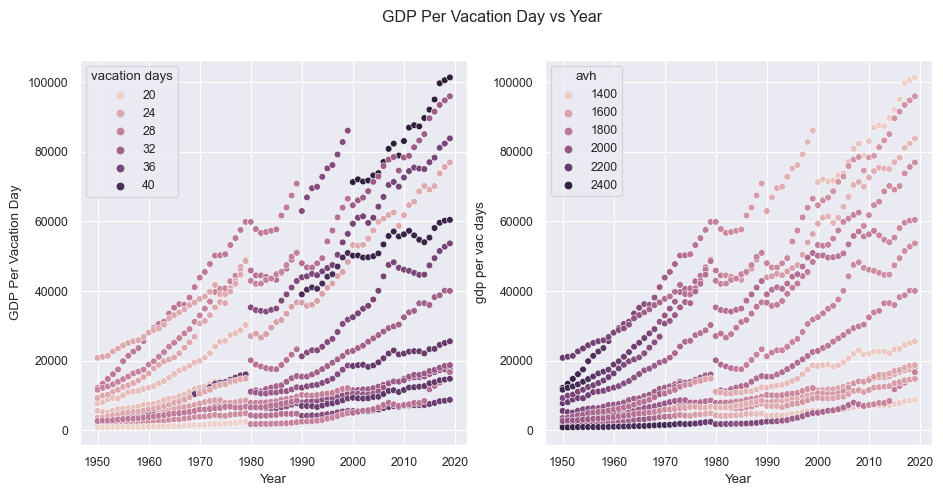

In [8]:
fig, axs = plt.subplots(ncols=2)
fig.set_figheight(5)
fig.set_figwidth(11)
axs[0].set_xlabel("Year")
axs[1].set_xlabel("Year")
axs[0].set_ylabel("GDP Per Vacation Day")
fig.suptitle('GDP Per Vacation Day vs Year')


df_noUS = df_clean.copy()   
df_noUS.drop(df_noUS[df_noUS['country'] == 'United States'].index, inplace = True)
sns.scatterplot(x='year', y='gdp per vac days', data = df_noUS, hue='vacation days', ax =axs[0])
sns.scatterplot(x='year', y='gdp per vac days', data = df_noUS, hue='avh', ax=axs[1])

Even with the extreme vacation days of 40+, the GDP per vacation day is high. Also, at these extreme vacation days, there is still the possibility that the corresponding annual hours worked may be high. However, the second figure on the right settles that possiblity. Therefore, this plot may indicate that increasing vacation days results in more return in the form of GDP.